In [1]:
import fitz
import pandas as pd
import numpy as np
from tabula import read_pdf

In [2]:
# Path to the PDF file
pdf_path = 'timetable.pdf'

# Get number of pages

In [3]:
# get number of pages

doc = fitz.open(pdf_path)
num_pages = len(doc)
doc.close()

# Reading tables

In [4]:
tables = read_pdf(pdf_path, pages='all', multiple_tables=True)

# Removing headers for first df

In [5]:
#Removing headers
def remove_header(df):
    header_row_index = df[df.iloc[:, 0] == 'COM COD'].index[0]
    df = df.drop(index=df.index[:header_row_index]).reset_index(drop=True)
    df.columns = df.iloc[0]
    df = df.drop(index=0).reset_index(drop=True)
    
    return df


# Fill Linearly

In [6]:
def forward_fill_course_details(df):
    df['COURSE TITLE'].fillna(method='ffill', inplace=True)
    df['COURSE NO.'].fillna(method='ffill', inplace=True)
    df['CREDIT\rL P U'].fillna(method='ffill', inplace=True)
    return df


# Dataframes based on number of tables

Iterate through number of pages, and merge the dfs together

In [7]:
df = remove_header(tables[0])
column_names = df.columns

for i in range(1, num_pages):
    temp_df = tables[i]
    temp_df.columns = column_names
    df = pd.concat([df, temp_df], ignore_index=True)

In [8]:
df = df.drop('COM COD', axis = 1)

Linearly filling

In [9]:
df = forward_fill_course_details(df)

Removing classes which don't have time slots assigned

In [10]:
df = df.dropna(subset=['DAYS/  HOURS'])

In [11]:
df['COURSE NO.'].unique()

array(['AN F311', 'BIO F110', 'BIO F111', 'BIOT F241', 'BIOT F243',
       'BIOT F244', 'BIOT F245', 'BIOT F342', 'BIOT F344', 'BIOT F417',
       'BIOT F423', 'BIOT F422', 'BITS F462', 'BITS F110', 'BITS F111',
       'BITS F112', 'BITS F225', 'BITS F312', 'BITS F416', 'BITS F452',
       'BITS F464', 'CE F241', 'CE F242', 'CE F244', 'CE F321', 'CE F342',
       'CE F343', 'CE F415', 'CE F423', 'CHE F241', 'CHE F242',
       'CHE F243', 'CHE F244', 'CHE F341', 'CHE F342', 'CHE F343',
       'CHE F414', 'CHE F416', 'CHEM F110', 'CHEM F111', 'CS F111',
       'CS F211', 'CS F212', 'CS F241', 'CS F303', 'CS F320', 'CS F363',
       'CS F364', 'CS F407', 'CS F415', 'CS F425', 'CS F429', 'ECE F241',
       'ECE F242', 'ECE F243', 'ECE F244', 'ECE F266', 'ECE F343',
       'ECE F344', 'ECE F432', 'ECE F472', 'ECON F211', 'ECON F312',
       'ECON F412', 'EEE F111', 'EEE F241', 'EEE F242', 'EEE F243',
       'EEE F244', 'EEE F341', 'EEE F342', 'EEE F417', 'EEE F472',
       'FIN F212', 'FIN 

# Parsing Days and Hours

Time slots with timings

In [12]:
import pandas as pd

time_slots = {
    'Monday': ['7:30-8:20', '8:25-9:15', '9:20-10:10', '10:15-11:05', '11:10-12:00', '12:05-12:55', '1:00-1:50', '1:55-2:45', '2:50-3:40'],
    'Tuesday': ['7:30-8:20', '8:25-9:15', '9:20-10:10', '10:15-11:05', '11:10-12:00', '12:05-12:55', '1:00-1:50', '1:55-2:45', '2:50-3:40'],
    'Wednesday': ['7:30-8:20', '8:25-9:15', '9:20-10:10', '10:15-11:05', '11:10-12:00', '12:05-12:55', '1:00-1:50', '1:55-2:45', '2:50-3:40'],
    'Thursday': ['7:30-8:20', '8:25-9:15', '9:20-10:10', '10:15-11:05', '11:10-12:00', '12:05-12:55', '1:00-1:50', '1:55-2:45', '2:50-3:40'],
    'Friday': ['7:30-8:20', '8:25-9:15', '9:20-10:10', '10:15-11:05', '11:10-12:00'],
}

def map_days_hours_to_time_slots(day_hour_str):
    days = {'M': 'Monday', 'T': 'Tuesday', 'W': 'Wednesday', 'Th': 'Thursday', 'F': 'Friday', 'S': 'Saturday', 'Su': 'Sunday'}
    day_hour_list = []
    day_str = ''
    hour_str = ''
    for char in day_hour_str:
        if char.isalpha():
            if day_str and hour_str:
                day = days.get(day_str, "Unknown Day")
                for hour in hour_str:
                    slot = time_slots[day][int(hour)-1]
                    day_hour_list.append((day, slot))
                day_str = ''
                hour_str = ''
            day_str += char
        elif char.isdigit():
            hour_str += char
    if day_str and hour_str:
        day = days.get(day_str, "Unknown Day")
        for hour in hour_str:
            slot = time_slots[day][int(hour)-1]
            day_hour_list.append((day, slot))
    return day_hour_list


df['TIME SLOTS'] = df['DAYS/  HOURS'].apply(map_days_hours_to_time_slots)
df

,COURSE NO.,COURSE TITLE,CREDIT\rL P U,SEC,INSTRUCTOR-IN-CHARGE/ Instructor,ROOM,DAYS/ HOURS,MIDSEM TEST,COMRE DATE &\rSESSION,TIME SLOTS
0,AN F311,PRINCIPLES OF AERODYNAMICS,3 0 3,1,MAJID H KHAN,276,M6 T2 F1,03.04.2024 FN,04.06.2024 AN,"[(Monday, 12:05-12:55), (Tuesday, 8:25-9:15), ..."
2,BIO F110,BIOLOGY LABORATORY,0 2 1,1,Aditya Sharma,307,M34,NaN,NaN,"[(Monday, 9:20-10:10), (Monday, 10:15-11:05)]"
3,BIO F110,BIOLOGY LABORATORY,0 2 1,2,Neeru Sood,307,M89,NaN,NaN,"[(Monday, 1:55-2:45), (Monday, 2:50-3:40)]"
4,BIO F110,BIOLOGY LABORATORY,0 2 1,3,Debostuti Ghosh,307,T34,NaN,NaN,"[(Tuesday, 9:20-10:10), (Tuesday, 10:15-11:05)]"
5,BIO F110,BIOLOGY LABORATORY,0 2 1,4,Neeru Sood,307,W12,NaN,NaN,"[(Wednesday, 7:30-8:20), (Wednesday, 8:25-9:15)]"
...,...,...,...,...,...,...,...,...,...,...
305,PHY F110,PHYSICS LABORATORY,0 2 1,8,Amarnath,309.0,Th89,NaN,NaN,"[(Thursday, 1:55-2:45), (Thursday, 2:50-3:40)]"
306,PHY F111,MECH OSCILLATIONS & WAVE,3 0 3,1,AMARNATH,165.0,M6 T1 Th6 F2,01.04.2024 FN,04.06.2024 FN,"[(Monday, 12:05-12:55), (Tuesday, 7:30-8:20), ..."
307,PHY F111,MECH OSCILLATIONS & WAVE,3 0 3,2,R Roopkumar,183.0,M6 T1 Th6 F2,NaN,NaN,"[(Monday, 12:05-12:55), (Tuesday, 7:30-8:20), ..."
308,PHY F111,MECH OSCILLATIONS & WAVE,3 0 3,3,K K Singh,190.0,M6 T8 W1 F2,NaN,NaN,"[(Monday, 12:05-12:55), (Tuesday, 1:55-2:45), ..."


In [13]:
third_year_second_semester_requirements = ('CS F363', 'CS F303', 'CS F364')

In [14]:
def clean_course_title(title):
    words = title.split()
    if 'Practical' in words:
        while words.count('Practical') > 1:
            words.remove('Practical')
        return ' '.join(words)
    else:
        return title

compulsory_df = df[df['COURSE NO.'].isin(third_year_second_semester_requirements)]
compulsory_df.reset_index(drop=True, inplace=True)
for index, row in compulsory_df.iterrows():
    if index == 0:  # Skip the first row
        continue
    
    if row['COURSE TITLE'] == 'Practical':
        prev_course_title = compulsory_df.at[index - 1, 'COURSE TITLE']
        compulsory_df.at[index, 'COURSE TITLE'] = prev_course_title + ' Practical'

compulsory_df['COURSE TITLE'] = compulsory_df.apply(lambda row: clean_course_title(row['COURSE TITLE']), axis=1)
compulsory_df

/var/folders/z1/0b4fr5_n0fg0z6szcfq9km100000gn/T/ipykernel_37666/3254796550.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compulsory_df['COURSE TITLE'] = compulsory_df.apply(lambda row: clean_course_title(row['COURSE TITLE']), axis=1)


,COURSE NO.,COURSE TITLE,CREDIT\rL P U,SEC,INSTRUCTOR-IN-CHARGE/ Instructor,ROOM,DAYS/ HOURS,MIDSEM TEST,COMRE DATE &\rSESSION,TIME SLOTS
0,CS F303,COMPUTER NETWORKS,3 1 4,1,PRANAV MOTABHAU PAWAR,269.0,M4 T3 W6 Th1,01.04.2024 AN,31.05.2024 FN,"[(Monday, 10:15-11:05), (Tuesday, 9:20-10:10),..."
1,CS F303,COMPUTER NETWORKS,3 1 4,2,Tamilarasan Periasamy,268.0,M4 W6 Th1 F2,NaN,NaN,"[(Monday, 10:15-11:05), (Wednesday, 12:05-12:5..."
2,CS F303,COMPUTER NETWORKS,3 1 4,3,Raja M,267.0,M4 T9 W6 Th1,NaN,NaN,"[(Monday, 10:15-11:05), (Tuesday, 2:50-3:40), ..."
3,CS F303,COMPUTER NETWORKS Practical,3 1 4,1,Tamilarasan Periasamy,335.0,W34,NaN,NaN,"[(Wednesday, 9:20-10:10), (Wednesday, 10:15-11..."
4,CS F303,COMPUTER NETWORKS Practical,3 1 4,2,Pranav Motabhau Pawar,335.0,Th89,NaN,NaN,"[(Thursday, 1:55-2:45), (Thursday, 2:50-3:40)]"
5,CS F303,COMPUTER NETWORKS Practical,3 1 4,3,Raja M,335.0,F34,NaN,NaN,"[(Friday, 9:20-10:10), (Friday, 10:15-11:05)]"
6,CS F363,COMPILER CONSTRUCTION,2 1 3,1,ELAKKIYA RAJASEKAR,269.0,M9 T5 Th2,29.03.2024 FN,29.05.2024 AN,"[(Monday, 2:50-3:40), (Tuesday, 11:10-12:00), ..."
7,CS F363,COMPILER CONSTRUCTION,2 1 3,2,Angel Arul Jothi,268.0,M3 T5 W9,NaN,NaN,"[(Monday, 9:20-10:10), (Tuesday, 11:10-12:00),..."
8,CS F363,COMPILER CONSTRUCTION,2 1 3,3,Elakkiya Rajasekar,267.0,T3 Th4 F2,NaN,NaN,"[(Tuesday, 9:20-10:10), (Thursday, 10:15-11:05..."
9,CS F363,COMPILER CONSTRUCTION Practical,2 1 3,1,Elakkiya Rajasekar,333.0,W34,NaN,NaN,"[(Wednesday, 9:20-10:10), (Wednesday, 10:15-11..."


In [15]:
from constraint import Problem

problem = Problem()

course_sections = {}  # Dictionary to hold course IDs and their section details

for _, row in compulsory_df.iterrows():
    course_id = row['COURSE TITLE']
    section = row['SEC']
    time_slots = row['TIME SLOTS']  # Assuming list of tuples like ('Monday', '10:15-11:05')

    if course_id not in course_sections:
        course_sections[course_id] = []

    # Each section is uniquely identified by its section number and includes its time slots
    course_sections[course_id].append((section, time_slots))

# Adding each course and its sections to the problem
for course_id, sections in course_sections.items():
    problem.addVariable(course_id, sections)


def no_overlap(section1, section2):
    times1 = section1[1]  # Time slots of the first section
    times2 = section2[1]  # Time slots of the second section
    for day1, time_range1 in times1:
        for day2, time_range2 in times2:
            if day1 == day2:
                start1, end1 = [int(t.replace(':', '')) for t in time_range1.split('-')]
                start2, end2 = [int(t.replace(':', '')) for t in time_range2.split('-')]
                if not (end1 <= start2 or start1 >= end2):
                    return False
    return True


def all_courses_no_overlap(*sections):
    # Sections will be a list of tuples (section_number, time_slots)
    for i in range(len(sections)):
        for j in range(i + 1, len(sections)):
            if not no_overlap(sections[i], sections[j]):
                return False
    return True

# Adding this constraint
problem.addConstraint(all_courses_no_overlap, list(course_sections.keys()))


solution = problem.getSolution()

if solution:
    print(solution)
else:
    print("No possible schedule found that satisfies all constraints.")


{'COMPILER CONSTRUCTION': (3, [('Tuesday', '9:20-10:10'), ('Thursday', '10:15-11:05'), ('Friday', '8:25-9:15')]), 'COMPILER CONSTRUCTION Practical': (3, [('Friday', '9:20-10:10'), ('Friday', '10:15-11:05')]), 'COMPUTER NETWORKS': (3, [('Monday', '10:15-11:05'), ('Tuesday', '2:50-3:40'), ('Wednesday', '12:05-12:55'), ('Thursday', '7:30-8:20')]), 'COMPUTER NETWORKS Practical': (2, [('Thursday', '1:55-2:45'), ('Thursday', '2:50-3:40')]), 'DESIGN & ANAL OF ALGO': (3, [('Monday', '9:20-10:10'), ('Tuesday', '1:55-2:45'), ('Wednesday', '2:50-3:40'), ('Thursday', '9:20-10:10')])}


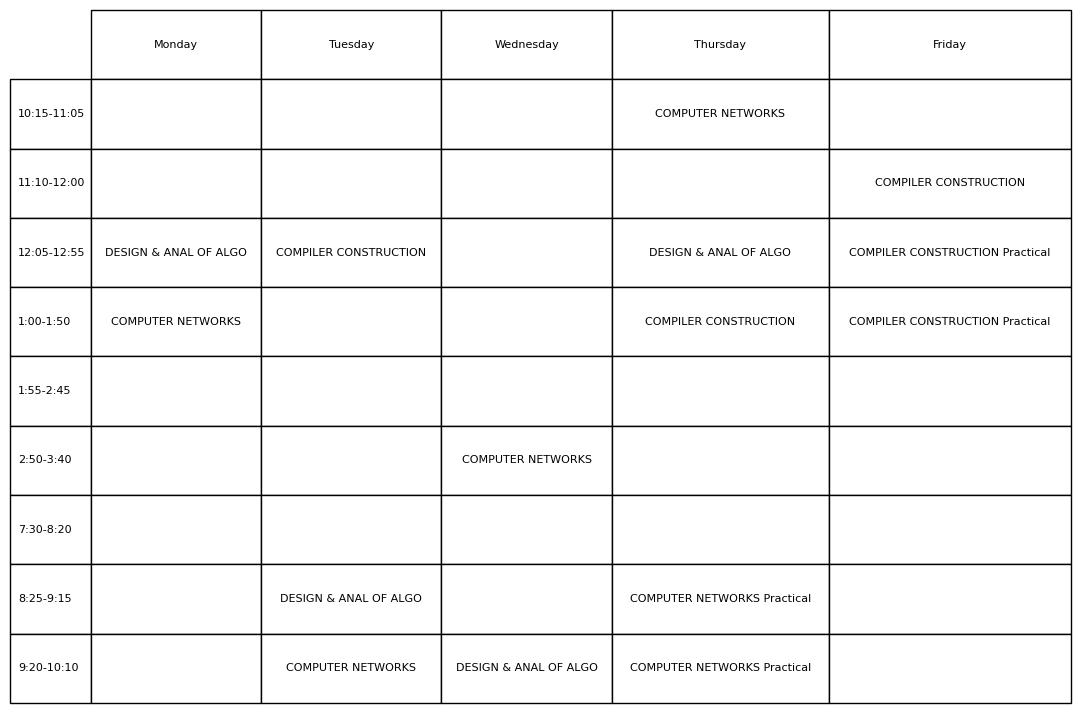

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Provided time slots and days
time_slots = {
    'Monday': ['7:30-8:20', '8:25-9:15', '9:20-10:10', '10:15-11:05', '11:10-12:00', '12:05-12:55', '1:00-1:50', '1:55-2:45', '2:50-3:40'],
    'Tuesday': ['7:30-8:20', '8:25-9:15', '9:20-10:10', '10:15-11:05', '11:10-12:00', '12:05-12:55', '1:00-1:50', '1:55-2:45', '2:50-3:40'],
    'Wednesday': ['7:30-8:20', '8:25-9:15', '9:20-10:10', '10:15-11:05', '11:10-12:00', '12:05-12:55', '1:00-1:50', '1:55-2:45', '2:50-3:40'],
    'Thursday': ['7:30-8:20', '8:25-9:15', '9:20-10:10', '10:15-11:05', '11:10-12:00', '12:05-12:55', '1:00-1:50', '1:55-2:45', '2:50-3:40'],
    'Friday': ['7:30-8:20', '8:25-9:15', '9:20-10:10', '10:15-11:05', '11:10-12:00']
}

# Creating a dictionary to map (day, time slot) to course titles from the solution
course_map = {}
for course, details in solution.items():
    section, times = details
    for day_time in times:
        day, time = day_time
        if (day, time) not in course_map:
            course_map[(day, time)] = course
        else:
            course_map[(day, time)] += " / " + course

num_days = len(time_slots)
max_slots = max(len(slots) for slots in time_slots.values())
timetable = np.full((num_days, max_slots), '', dtype=object)

days_list = list(time_slots.keys())
all_slots = set(slot for day_slots in time_slots.values() for slot in day_slots)
slots_list = sorted(all_slots)

# Filling the timetable with course titles
for day_idx, (day, slots) in enumerate(time_slots.items()):
    for slot_idx, slot in enumerate(slots):
        if (day, slot) in course_map:
            timetable[day_idx, slot_idx] = course_map[(day, slot)]
        else:
            timetable[day_idx, slot_idx] = ''

timetable_transposed = timetable.T

# Plotting the timetable
fig, ax = plt.subplots(figsize=(12, 9))
ax.set_axis_off()

table = ax.table(
    cellText=timetable_transposed,
    rowLabels=slots_list,
    colLabels=days_list,
    cellLoc='center',
    loc='center'
)

# Adjust font size
table.set_fontsize(8)

# Dynamically adjust cell width and height
max_text_length = max(len(str(cell)) for row in timetable_transposed for cell in row)
cell_width = max(0.1, min(0.2, 0.005 * max_text_length))  # Adjust the scaling factor based on your data
cell_height = 0.05  # Adjust the height as needed

table.auto_set_column_width(col=list(range(len(days_list))))  # Automatically adjust column width based on content
for key, cell in table.get_celld().items():
    cell.set_height(cell_height)
    cell.set_width(cell_width)

table.scale(1, 2)  # Scale table size, adjust as necessary
plt.show()

In [17]:
timetable_df = pd.DataFrame(timetable_transposed, columns=list(time_slots.keys()))

In [18]:
timetable_df

,Monday,Tuesday,Wednesday,Thursday,Friday
0,,,,COMPUTER NETWORKS,
1,,,,,COMPILER CONSTRUCTION
2,DESIGN & ANAL OF ALGO,COMPILER CONSTRUCTION,,DESIGN & ANAL OF ALGO,COMPILER CONSTRUCTION Practical
3,COMPUTER NETWORKS,,,COMPILER CONSTRUCTION,COMPILER CONSTRUCTION Practical
4,,,,,
5,,,COMPUTER NETWORKS,,
6,,,,,
7,,DESIGN & ANAL OF ALGO,,COMPUTER NETWORKS Practical,
8,,COMPUTER NETWORKS,DESIGN & ANAL OF ALGO,COMPUTER NETWORKS Practical,


# Handling enforced constraint

In [19]:
enforced_course_id = 'COMPUTER NETWORKS'
enforced_section = 2
enforced_time_slots = [('Monday', '10:15-11:05'), ('Wednesday', '1:00-1:50')]


In [20]:
from constraint import Problem

problem = Problem()

# Assuming course_sections is already populated from previous steps
for course_id, sections in course_sections.items():
    if course_id == enforced_course_id:
        # Setting the domain to only the enforced section
        problem.addVariable(course_id, [(enforced_section, enforced_time_slots)])
    else:
        # Adding each course and its sections to the problem as normal
        problem.addVariable(course_id, sections)

In [21]:
third_year_second_semester_requirements = ('CS F363', 'CS F303', 'CS F364')

In [33]:
enforced_course_id = 'COMPUTER NETWORKS'
enforced_section = 2

# Filter the DataFrame to exclude the non-required sections for the specified course
compulsory_df2 = compulsory_df[~((compulsory_df['COURSE TITLE'] == enforced_course_id) & 
                                (compulsory_df['SEC'] != enforced_section))]


In [27]:
section_number = 2
course = 'COMPILER CONSTRUCTION'
instructor_name = compulsory_df[(compulsory_df['SEC'] == section_number) & (compulsory_df['COURSE TITLE'] == course)]['INSTRUCTOR-IN-CHARGE/ Instructor']
instructor_name

filtered_df = compulsory_df[(compulsory_df['SEC'] == section_number) & (compulsory_df['COURSE TITLE'] == course)]['INSTRUCTOR-IN-CHARGE/ Instructor']
instructor_name = filtered_df.iloc[0]

7    Angel Arul Jothi
Name: INSTRUCTOR-IN-CHARGE/ Instructor, dtype: object